# Part One

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import datetime 
import calendar
import numpy as np
from bokeh.plotting import output_file, show, figure
import json
from dateutil.relativedelta import relativedelta

%matplotlib inline

In [2]:
li_data = pd.read_json('logins.json')

li_data['count'] = 1
# setting the count for each ride to one, so that we can easily count amount of rides when resampling

li_data_15 = li_data.set_index('login_time').resample('15T').count()
# data into 15 minute intervals

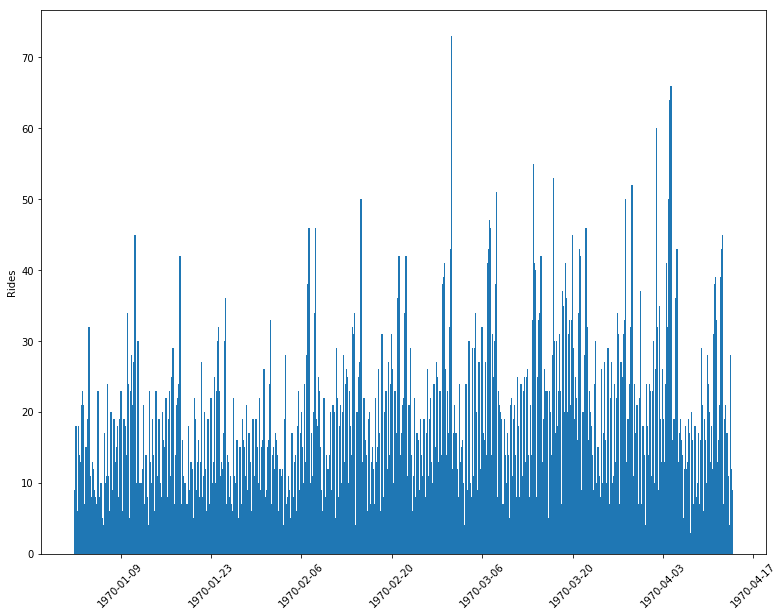

In [3]:
plt.figure(figsize=(13,10))
plt.bar(li_data_15.index, li_data_15['count'], width=.2)
plt.xticks(rotation=45)
plt.ylabel('Rides')
plt.show()
# in notebook 

p = figure(plot_width=600, plot_height=400,  y_axis_label = 'Rides', x_axis_type='datetime')
p.vbar(x = li_data_15.index, top = li_data_15['count'], width=1)
show(p)
# opens bokeh link to zoom in on graph

By looking at the data in 15 minute intervals, we see a general trend of increasing activity, but possibly a fall off at the end of our data. There are clear spikes in activity that are likely weekly, but the intervals are slightly too short to see exactly when these spikes happen. Let's look at the daily averages to see if that helps us determine when there is greater demand.

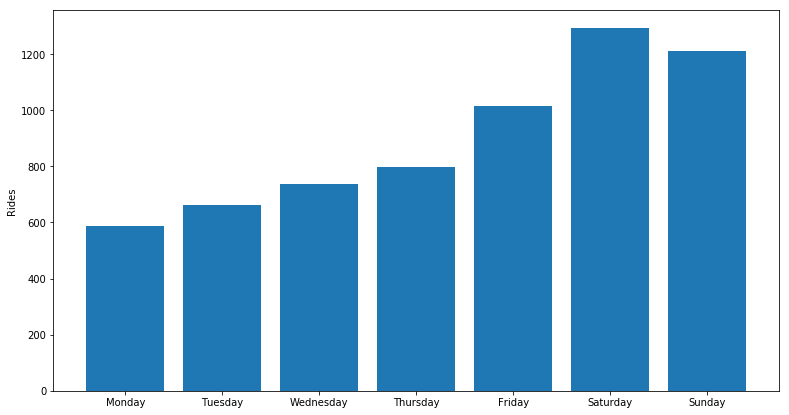

In [4]:
li_data_d = li_data.set_index('login_time').resample('D').count()
li_data_d['Day'] = li_data_d.index.dayofweek
weekly_data = li_data_d.groupby('Day').mean()
# resampling by day to see daily averages

plt.figure(figsize=(13,7))
plt.bar(weekly_data.index, weekly_data['count'])
plt.xticks(np.arange(7), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.ylabel('Rides')
plt.show()

Activity increases throughout the week, peaking on Saturday and second highest on Sunday. Let's look at the individual days to see their trends. 

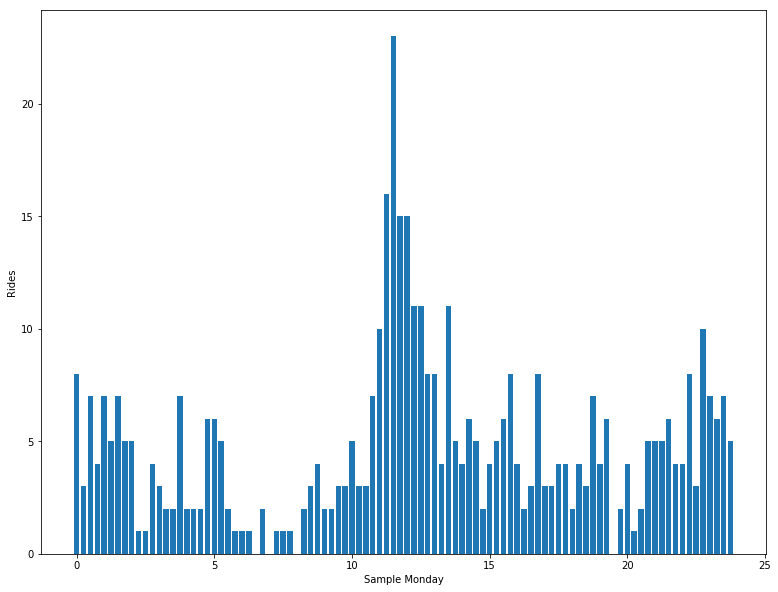

In [5]:
li_data_15['Day'] = li_data_15.index.dayofweek

dow = datetime.datetime(1970, 1, 5)
# so that we can get the day of the week

'''p = figure(plot_width=600, plot_height=400,  y_axis_label = 'count', title = '1970-01-05')
p.vbar(x = np.linspace(0,23.75,96), top = li_data_15['1970-01-05']['count'], width=.2)
show(p)''' # bokeh plot if zooming in is desired

plt.figure(figsize=(13,10))
plt.bar(x = np.linspace(0,23.75,96), height = li_data_15['1970-01-05']['count'], width=.2)
plt.ylabel('Rides')
plt.xlabel('Sample %s' % calendar.day_name[dow.weekday()] )
plt.show()

Mondays have a spike around lunch time with otherwise stable activity. 

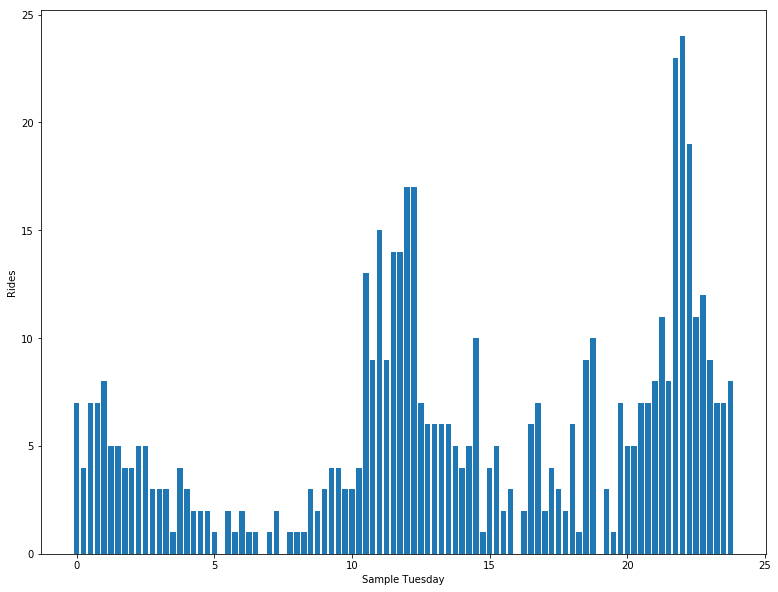

In [6]:
dow = datetime.datetime(1970, 1, 6)
# so that we can get the day of the week

'''p = figure(plot_width=600, plot_height=400,  y_axis_label = 'count', title = '1970-01-06')
p.vbar(x = np.linspace(0,23.75,96), top = li_data_15['1970-01-06']['count'], width=.2)
show(p)''' # bokeh plot if zooming in is desired

plt.figure(figsize=(13,10))
plt.bar(x = np.linspace(0,23.75,96), height = li_data_15['1970-01-06']['count'], width=.2)
plt.ylabel('Rides')
plt.xlabel('Sample %s' % calendar.day_name[dow.weekday()] )
plt.show()

Tuesdays have two spikes, one at lunch like Monday and another later at night around 10:00 PM.

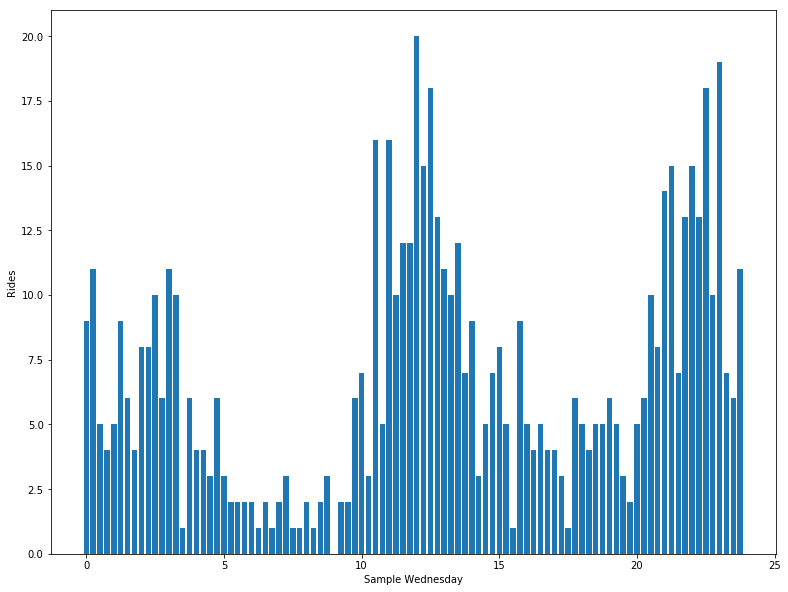

In [7]:
dow = datetime.datetime(1970, 1, 7)
# so that we can get the day of the week

'''p = figure(plot_width=600, plot_height=400,  y_axis_label = 'count', title = '1970-01-07')
p.vbar(x = np.linspace(0,23.75,96), top = li_data_15['1970-01-07']['count'], width=.2)
show(p)''' # bokeh plot if zooming in is desired

plt.figure(figsize=(13,10))
plt.bar(x = np.linspace(0,23.75,96), height = li_data_15['1970-01-07']['count'], width=.2)
plt.ylabel('Rides')
plt.xlabel('Sample %s' % calendar.day_name[dow.weekday()] )
plt.show()

Activity on Wednesdays mirrors that of Tuesdays, but with slightly greater activity at all times. 

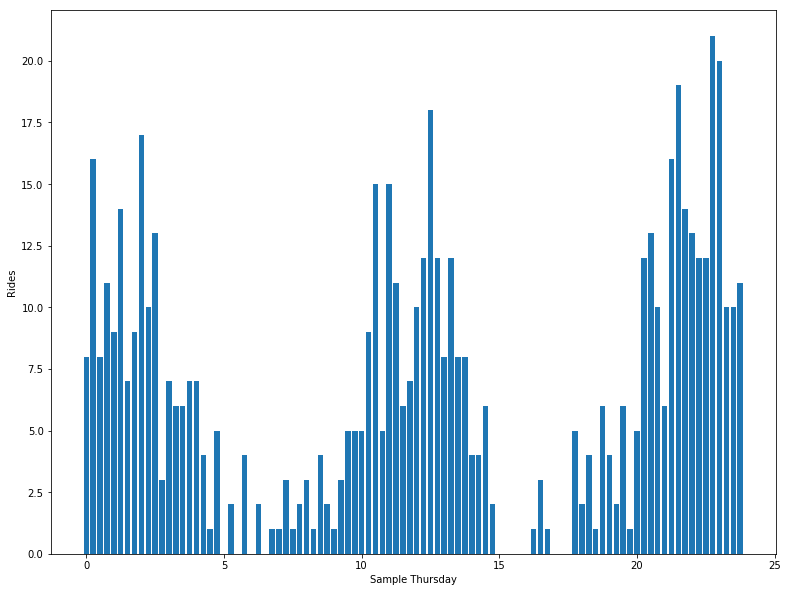

In [8]:
dow = datetime.datetime(1970, 1, 8)
# so that we can get the day of the week

'''p = figure(plot_width=600, plot_height=400,  y_axis_label = 'count', title = '1970-01-08')
p.vbar(x = np.linspace(0,23.75,96), top = li_data_15['1970-01-08']['count'], width=.2)
show(p)''' # bokeh plot if zooming in is desired

plt.figure(figsize=(13,10))
plt.bar(x = np.linspace(0,23.75,96), height = li_data_15['1970-01-08']['count'], width=.2)
plt.ylabel('Rides')
plt.xlabel('Sample %s' % calendar.day_name[dow.weekday()] )
plt.show()

Thursday has three activity peaks, one early in the morning (late on Wednesday night), one around lunch, and another at night. 

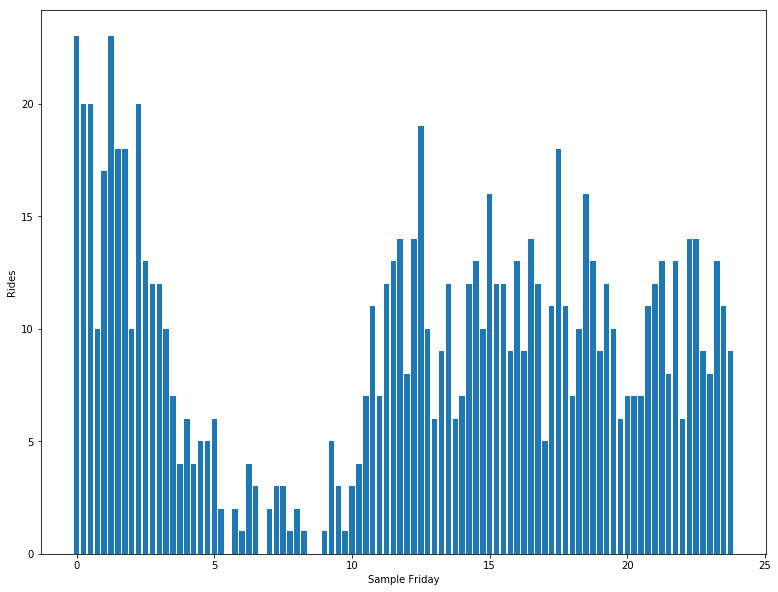

In [9]:
dow = datetime.datetime(1970, 1, 9)
# so that we can get the day of the week

'''p = figure(plot_width=600, plot_height=400,  y_axis_label = 'count', title = '1970-01-09')
p.vbar(x = np.linspace(0,23.75,96), top = li_data_15['1970-01-09']['count'], width=.2)
show(p)''' # bokeh plot if zooming in is desired

plt.figure(figsize=(13,10))
plt.bar(x = np.linspace(0,23.75,96), height = li_data_15['1970-01-09']['count'], width=.2)
plt.ylabel('Rides')
plt.xlabel('Sample %s' % calendar.day_name[dow.weekday()] )
plt.show()

Friday has high activity early in the morning (late Thursday night), and consistent high activity starting at lunch through the rest of the day and night. 

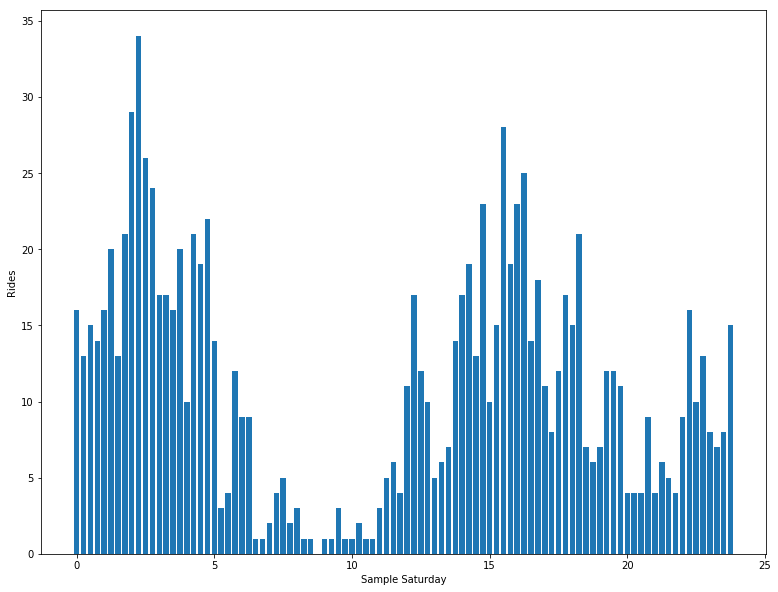

In [10]:
dow = datetime.datetime(1970, 1, 10)
# so that we can get the day of the week

'''p = figure(plot_width=600, plot_height=400,  y_axis_label = 'count', title = '1970-01-10')
p.vbar(x = np.linspace(0,23.75,96), top = li_data_15['1970-01-10']['count'], width=.2)
show(p)''' # bokeh plot if zooming in is desired

plt.figure(figsize=(13,10))
plt.bar(x = np.linspace(0,23.75,96), height = li_data_15['1970-01-10']['count'], width=.2)
plt.ylabel('Rides')
plt.xlabel('Sample %s' % calendar.day_name[dow.weekday()] )
plt.show()

Saturday peaks early in the morning (late Friday night) and again in the afternoon around 3:00 PM.

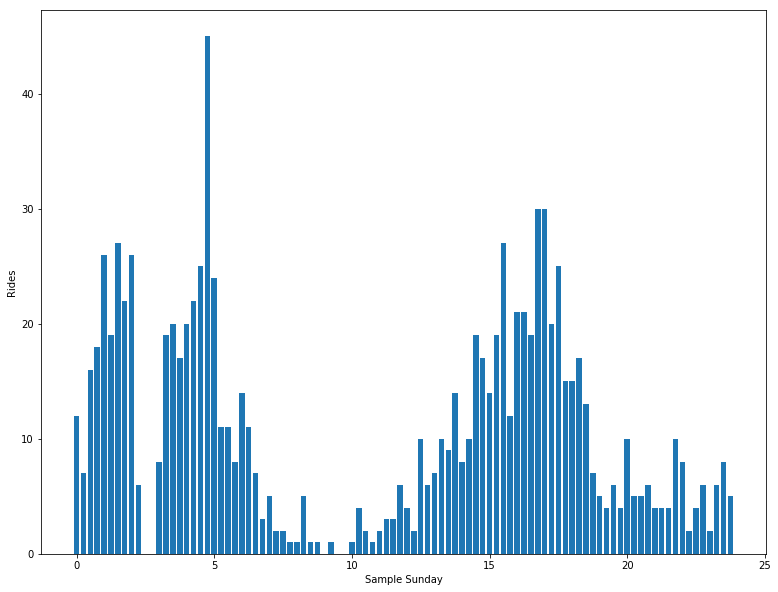

In [11]:
dow = datetime.datetime(1970, 1, 11)
# so that we can get the day of the week

'''p = figure(plot_width=600, plot_height=400,  y_axis_label = 'count', title = '1970-01-11')
p.vbar(x = np.linspace(0,23.75,96), top = li_data_15['1970-01-11']['count'], width=.2)
show(p)''' # bokeh plot if zooming in is desired

plt.figure(figsize=(13,10))
plt.bar(x = np.linspace(0,23.75,96), height = li_data_15['1970-01-11']['count'], width=.2)
plt.ylabel('Rides')
plt.xlabel('Sample %s' % calendar.day_name[dow.weekday()] )
plt.show()

Sunday activity is strong early in the morning (late Saturday night) and in the late afternoon around 5:00 PM. 

# Part Two

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats


# Answer


I would choose the number of toll bridge crossings per driver partner per week day as a key measure of success of this experiment. It would clearly indicate whether driver partners are taking advantage of the experiment or not. Since demand is fairly equal on weekends driver partners are less likely to cross the toll bridge, thus weekends are not the focus of the experiment. Additionally, it is likely easy to obtain the data before the experiment since driver partner ride history is likely available and after the experiment it will be easily determined by measuring the number of tolls reimbursed. 

To run an experiment to determine the effectiveness of the change, the first thing we must do is get a baseline or control group. Before implementing the reimbursement of tolls, we will record the number of drivers going through the toll bridge per week day on average for the past three months, which would give us over 60 data points meeting the requirements for the Central Limit Theorem to be normally distributed. Once the reimbursement is implemented, we will record the number of toll bridge crossings per driver partner per week day for the following three months. Using this data we will then run a T-test for statistcal significance. Our null hypthesis would be that the new number of toll bridge crossings per driver partner per week day is not significantly higher than the prior number of toll bridge crossings per driver partner per week day. Additionally, we could create a confidence interval to determine how confident we are in our conclusion. 

If the null hypothesis were not rejected, I would conclude that the reimbursement of toll bridge costs did not raise the number of driver partners crossing the bridge per week day and thus that more driver partners are not operating in both cities on week days. This is through the lens of a statistical test, so even though this may be the conclusion we reach, it is not a garuantee to be fact. It is just the most likely conclusion. As a result, I would recomend looking for a different tactic to increase the number of driver partners in both cities.

If the null hypothesis were rejected, I would conclude that the reimbursement of toll bridge costs raised the number of driver partners crossing the bridge per week day and thus that more drivers are operating in both cities on week days and that the change had the desired effect. 

# Part Three

In [12]:
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)

data = pd.DataFrame(data)

In [13]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Most of the null values come from the avg_rating_of_driver column. Let's see how the data without avg_rating_of_driver values compare to the entire dataset.

In [15]:
data.describe() - data[data.avg_rating_of_driver.isnull()].drop('avg_rating_of_driver', axis=1).describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41878.000000,41744.000000,NaN,41878.000000,41878.000000,41878.000000,41878.000000
mean,-1.709440,-0.007826,NaN,-0.003446,0.301469,1.684873,1.875136
std,-2.051259,-0.175470,NaN,-0.087970,-6.619650,3.185929,-9.778235
min,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.010000,-0.300000,NaN,0.000000,0.000000,0.000000,33.300000
50%,-0.835000,0.000000,NaN,0.000000,0.000000,0.000000,-33.300000
75%,-3.780000,0.000000,NaN,0.050000,8.600000,2.000000,0.000000
max,0.000000,0.000000,NaN,3.000000,0.000000,120.000000,0.000000


In [16]:
len(data.dropna())

41445

Given the differences in data without the avg_rating_of_driver (shown notably in avg_dist, surge_pct, trips_in_first_30_days, and weekday_pct by their respective differences in mean and std), it is best not to assume that the avg_rating_of_driver would be the same. If those other columns are different, then avg_rating_of_driver is likely different as well. Thus we will not fill in the data without avg_rating_of_driver, and instead drop all the null values. This leaves us with 41,445 data points, which is still plenty of data.

In [17]:
data = data.dropna()

data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


Nothing seems to stand out or look anomalous in the data. 

In [18]:
data.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,1.000000,0.083190,0.034877,-0.085750,-0.110894,-0.136471,0.027206,0.102048
avg_rating_by_driver,0.083190,1.000000,0.122413,0.012418,0.019703,-0.045788,0.005708,0.018312
avg_rating_of_driver,0.034877,0.122413,1.000000,-0.022209,-0.001696,-0.011849,-0.003292,0.012975
avg_surge,-0.085750,0.012418,-0.022209,1.000000,0.795737,-0.000262,-0.070613,-0.118999
surge_pct,-0.110894,0.019703,-0.001696,0.795737,1.000000,0.005370,-0.099814,-0.155179
trips_in_first_30_days,-0.136471,-0.045788,-0.011849,-0.000262,0.005370,1.000000,0.115066,0.055556
ultimate_black_user,0.027206,0.005708,-0.003292,-0.070613,-0.099814,0.115066,1.000000,0.033964
weekday_pct,0.102048,0.018312,0.012975,-0.118999,-0.155179,0.055556,0.033964,1.000000


avg_surge and surge_pct have a strong positive correlation, but the rest of the variables seem to independent. We will drop avg_surge and that should eliminate any concern of multicollinearity issues. 

In [19]:
data = data.drop('avg_surge',axis=1)

In [20]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'], infer_datetime_format=True)
data['signup_date'] = pd.to_datetime(data['signup_date'], infer_datetime_format=True)

In [21]:
def active(x):
    if x >= datetime.datetime(2014,6,1):
        return 1
    else:
        return 0 

data['active'] = data['last_trip_date'].apply(active)

In [22]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [23]:
data['active'].mean()

0.41102666184099407

41.103% of users are active in their 6th month in the ultimate system.

In [24]:
m_data = data.join(pd.get_dummies(data['city']))
m_data.drop('city', axis=1, inplace=True) # creating dummy variables for each city
m_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,Astapor,King's Landing,Winterfell
0,3.67,5.0,4.7,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,0,1,0
1,8.26,5.0,5.0,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,1,0,0
2,0.77,5.0,4.3,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,1,0,0
3,2.36,4.9,4.6,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,0,1,0
4,3.13,4.9,4.4,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,0,0,1


In [25]:
m_data = m_data.join(pd.get_dummies(m_data['phone']))
m_data.drop('phone', axis=1, inplace=True) # creating dummy variables for each phone
m_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,Astapor,King's Landing,Winterfell,Android,iPhone
0,3.67,5.0,4.7,2014-06-17,2014-01-25,15.4,4,True,46.2,1,0,1,0,0,1
1,8.26,5.0,5.0,2014-05-05,2014-01-29,0.0,0,False,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,2014-01-07,2014-01-06,0.0,3,False,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,2014-06-29,2014-01-10,20.0,9,True,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,2014-03-15,2014-01-27,11.8,14,False,82.4,0,0,0,1,1,0


In [26]:
m_data.head()
def ultimate(x):
    if x == True:
        return 1
    else:
        return 0

m_data['ultimate_black_user'] = m_data['ultimate_black_user'].apply(ultimate)
# converting ultimate_black_user column to 1s and 0s instead of True and False

In [27]:
m_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,Astapor,King's Landing,Winterfell,Android,iPhone
0,3.67,5.0,4.7,2014-06-17,2014-01-25,15.4,4,1,46.2,1,0,1,0,0,1
1,8.26,5.0,5.0,2014-05-05,2014-01-29,0.0,0,0,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,2014-01-07,2014-01-06,0.0,3,0,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,2014-06-29,2014-01-10,20.0,9,1,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,2014-03-15,2014-01-27,11.8,14,0,82.4,0,0,0,1,1,0


# Model

Now that our data is ready, we are going to build our model. We are going to use a logistic regression model due to its fairly strong predictive abilities, and most importantly its interpretability. Other deep learning or a random forest classification model could likely offer greater prediction accuracy, but how they predict will be hard to understand. 

With the logistic regression, we will see exactly how much it weighs each feature to get its result, while hopefully maintaining good accuracy. 

I am concerned about the potential loss in accuracy, but the ease of understanding outweighs this concern. Accuracy will be the key indicator of model performance in this case since the target variable (active or not) has a relatively even split. 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [29]:
# splitting the data into training and testing data randomly
y = m_data['active']
X = m_data.drop(['active','last_trip_date','signup_date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

In [30]:
n_params = [{'penalty':['l1','l2'], 'C':[.01,.1,1,10,100]}]

lrgs = GridSearchCV(LogisticRegression(), n_params, cv=5, scoring='accuracy').fit(X_train, y_train)

print('LR GridSearchCV Best Score: ', lrgs.best_score_, ' with ' , lrgs.best_params_ )

print('LR Test Score: ', accuracy_score(y_test, lrgs.predict(X_test))) 
print('LR Train Score: ', accuracy_score(y_train, lrgs.predict(X_train)))

LR GridSearchCV Best Score:  0.705335120643  with  {'C': 0.01, 'penalty': 'l1'}
LR Test Score:  0.704221954162
LR Train Score:  0.705710455764


In [31]:
lr = LogisticRegression(class_weight= 'balanced', C=.01, penalty='l2').fit(X_train,y_train)
coef = list(zip(lr.coef_[0], X_train.columns))
coef

[(-0.037033616817357617, 'avg_dist'),
 (-0.15114089780508425, 'avg_rating_by_driver'),
 (-0.029325193404128078, 'avg_rating_of_driver'),
 (0.0018071343416418795, 'surge_pct'),
 (0.10807679556664554, 'trips_in_first_30_days'),
 (0.85138101188776427, 'ultimate_black_user'),
 (-7.2948665551060139e-05, 'weekday_pct'),
 (-0.64778738356976517, 'Astapor'),
 (0.95869455965501205, "King's Landing"),
 (-0.15293901982184477, 'Winterfell'),
 (-0.44985744445831161, 'Android'),
 (0.60782560072211911, 'iPhone')]

With approximately 70% accuracy this model predicts whether a user will stay after 6 months. By looking at the coefficients by feature we can see what the model thought was most predictive of retention. Using this knowledge, it seems as though costumers riding in King's Landing or that used the Ultimate Black service in the first 30 days are most likely to be retained. Android users and costumers riding in Astapor are most likely to be lost. I would recomend further research into why Astapor and Android users are not retained. Specifically identifying key differences between the experience and users in Astapor vs. King's Landing and Iphone vs. Android could lead to insights that significantly bolster 6 month retention. 